![CC-BY-SA](https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by-sa.svg)


This notebook was created by [Bernardo Freitas Paulo da Costa](http://www.im.ufrj.br/bernardofpc),
and is licensed under Creative Commons BY-SA.

Antes de enviar este Teste, verifique que tudo está funcionando como esperado.
Por exemplo, **rode o código inteiro, do zero**.
Para isso, vá no menu, escolha _Kernel_, depois _Restart & Run All_.

Verifique, também, que você respondeu todas as questões:
* as questões de código têm `YOUR CODE HERE` (e você pode apagar o `raise NotImplemented` ao incluir sua resposta)
* as questões discursivas têm "YOUR ANSWER HERE".

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parte 1: Interpolação, Regressão e Derivadas

Vimos que, ao usar interpolação polinomial com pontos igualmente espaçados,
a função fica bem melhor aproximada no centro do intervalo do que nas extremidades.
Nesta parte, veremos como estas técnicas poderiam ser usadas para aproximar as derivadas de uma função.

## Questão 1: Funções básicas

In [2]:
def interp(xs, ys):
    "Retorna os coeficientes do polinomio interpolador para os pontos  (xs, ys)."
    def vander(a):
        l = len(a)
        return np.array([[a[v] ** i for i in range(l)] for v in range(l)])
    _xs = vander(xs)
    return np.linalg.solve(_xs, ys)

In [3]:
def regress(xs, ys, d):
    "Retorna os coeficientes do polinomio de grau  d  que aproxima, em mínimos quadrados, os pontos  (xs, ys)."
    axs = np.array(xs)
    model = np.array([np.power(axs, i) for i in range(d+1)]).transpose()
    coefs, *_ = np.linalg.lstsq(model, ys, rcond=None)
    # Observação: Retorna os coeficientes do menor grau para o maior - 
    # para ser do maior para o menor, precisa reverter
    return coefs

In [4]:
def polyval(coefs, t):
    "Calcula o valor do polinômio com coeficietes  coefs  (dados em ordem crescente) nos pontos  t."    
    def poly_eval(coefs, t):
        ts = np.array([np.power(t, i) for i in range(len(coefs))])
        cs = np.array(coefs)
        c = cs * ts
        return sum(c)
    return np.array([poly_eval(coefs, tt) for tt in t])

In [5]:
assert np.allclose(polyval([1,2], [0,1,2,3]), [1,3,5,7])

In [6]:
assert np.allclose(polyval([1,0,1,2], [0,1,-1,1/2,3]), [1, 4, 0, 3/2, 64])

In [7]:
def derivada(coefs):
    "Retorna a lista dos coeficientes do polinômio que é a derivada do polinômio dados pelos coeficientes  coefs."
    return [coefs[i] * i for i in range(len(coefs))][1:]

In [8]:
assert np.allclose(derivada([1,2,3,4,5]), [2,6,12,20])

## Questão 2: Erros de interpolação

Usando pontos igualmente espaçados,
podemos calular um polinômio $p_d$ de grau $d$ que interpola uma função $f$.
Ao derivar este polinômio, obtemos uma aproximação da derivada $f'$.

Vamos estudar como este método funciona para a função seno.

Faça, lado a lado (usando `subplots`),
o gráfico do erro cometido pelo polinômio de interpolação de grau 2 para a função seno no intervalo [0,3],
e o erro resultante de usar a derivada deste polinômio para aproximar a derivada.

Média do erro de interpolação de dSeno (Grau 2): 0.06458183565312782


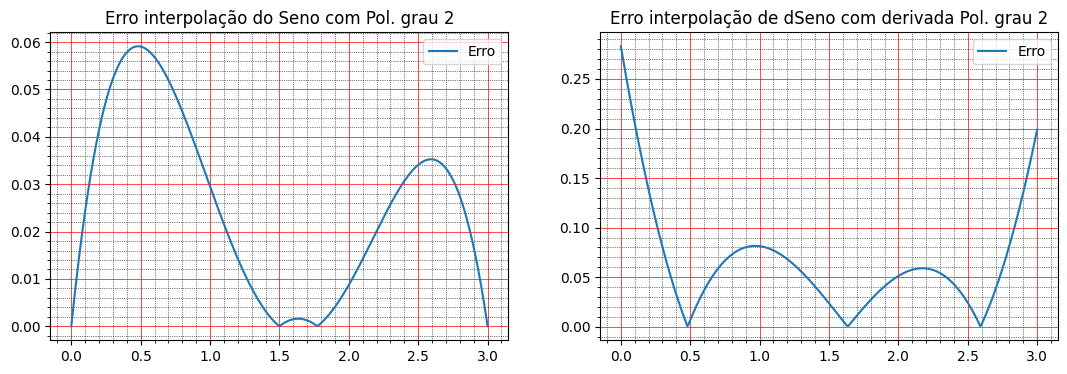

In [9]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(13,4))

intervalo_interp = [0, 1.5, 3]
sin_interp = np.sin(intervalo_interp)

coefs_interp = interp(intervalo_interp, sin_interp)
dcoefs_interp = derivada(coefs_interp)

def make_interval(i,e, step=0.01):
    r = np.arange(i, e, step)
    if(r[-1] < e):
        r = np.append(r, e)
    return r

intervalo = make_interval(0, 3)
seno = np.sin(intervalo)
dseno = np.cos(intervalo)
seno_interp = polyval(coefs_interp, intervalo)
dseno_interp = polyval(dcoefs_interp, intervalo)

plt.subplot(1,2,1)
erro = np.abs(seno - seno_interp)
plt.plot(intervalo,erro, label="Erro")
ax1.set_axisbelow(True)
ax1.minorticks_on()
ax1.grid(which='major', linestyle='-', linewidth='0.5', color='red')
ax1.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title("Erro interpolação do Seno com Pol. grau 2")
plt.legend()

plt.subplot(1,2,2)
derro = np.abs(dseno - dseno_interp)
plt.plot(intervalo,derro, label="Erro")
ax2.set_axisbelow(True)
ax2.minorticks_on()
ax2.grid(which='major', linestyle='-', linewidth='0.5', color='red')
ax2.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title("Erro interpolação de dSeno com derivada Pol. grau 2")
plt.legend()

print("Média do erro de interpolação de dSeno (Grau 2): {}".format(np.average(derro)))

fig = plt.gcf()

In [10]:
for ax in fig.axes:
    assert len(ax.get_title()) >= 10

Quem tem mais erro: a aproximação da função ou da derivada?
(Talvez você tenha que ajustar `ylim` para ver melhor o gráfico)

A aproximação da Derivada, claramente, tem um erro maior. Vendo pelo gráfico, que possui uma grade bem explícita, é possível ver que, mesmo ignorados os erros das extremidades dos intervalos, os erros da derivada chegam a um valor de $0.08$, enquanto o erro da aproximação da função chega, no máximo, a um erro de $0.06$.

Considerando as extremidades, o erro de aproximação chegam a um valor maior do que $0.28$, mostrando que a aproximação da derivada é maior.

## Questão 3: mais graus!

Faça também para os graus 4, 6 e 8.

Erro médio para função - interpolação grau 4: 0.00046834435957573154
Erro máximo para função - interpolação grau 4: 0.0018338324301496178
Erro médio para derivada - interpolação grau 4: 0.0022196094813308927
Erro máximo para derivada - interpolação grau 4: 0.01837199006653234

Erro médio para função - interpolação grau 6: 5.452530915095791e-06
Erro máximo para função - interpolação grau 6: 3.322105622929894e-05
Erro médio para derivada - interpolação grau 6: 3.9044229932942174e-05
Erro máximo para derivada - interpolação grau 6: 0.0005372878229745748

Erro médio para função - interpolação grau 8: 4.417496296015481e-08
Erro máximo para função - interpolação grau 8: 3.9668064918951806e-07
Erro médio para derivada - interpolação grau 8: 4.348509393758665e-07
Erro máximo para derivada - interpolação grau 8: 9.087680027719536e-06

Máximas diferença de erro - Pol. grau 4: 
0.016538157636382722
Máximas diferença de erro - Pol. grau 6: 
0.0005040667667452758
Máximas diferença de erro - Pol. gr

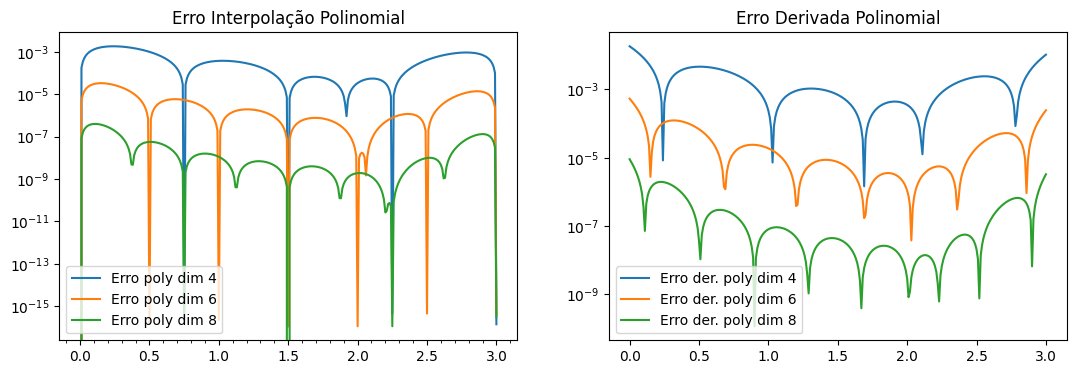

In [11]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(13,4))

def make_interval(i,e, step=0.01):
    r = np.arange(i, e, step)
    if(r[-1] < e):
        r = np.append(r, e)
    return r

intervalo = make_interval(0, 3)
seno = np.sin(intervalo)
dseno = np.cos(intervalo)

def eval_erro_derro(grau, interv):
    intervalo_interp = make_interval(0,3,3/grau)
    sin_interp = np.sin(intervalo_interp)
    coefs_interp = interp(intervalo_interp, sin_interp)
    dcoefs_interp = derivada(coefs_interp)
    seno_interp = polyval(coefs_interp, interv)
    dseno_interp = polyval(dcoefs_interp, interv)
    erro = np.abs(seno - seno_interp)
    derro = np.abs(dseno - dseno_interp)
    print("Erro médio para função - interpolação grau {}: {}".format(grau, np.average(erro)))
    print("Erro máximo para função - interpolação grau {}: {}".format(grau, np.max(erro)))
    print("Erro médio para derivada - interpolação grau {}: {}".format(grau, np.average(derro)))
    print("Erro máximo para derivada - interpolação grau {}: {}".format(grau, np.max(derro)))
    print()
    return (erro, derro)

(erro4, derro4) = eval_erro_derro(4, intervalo)
(erro6, derro6) = eval_erro_derro(6, intervalo)
(erro8, derro8) = eval_erro_derro(8, intervalo)

# Erros de Função
plt.subplot(1,2,1)
plt.semilogy(intervalo, erro4, label="Erro poly dim 4")
plt.semilogy(intervalo, erro6, label="Erro poly dim 6")
plt.semilogy(intervalo, erro8, label="Erro poly dim 8")
ax1.set_axisbelow(True)
ax1.minorticks_on()
plt.title("Erro Interpolação Polinomial")
plt.legend()

# Erros de Derivada
plt.subplot(1,2,2)
plt.semilogy(intervalo, derro4, label="Erro der. poly dim 4")
plt.semilogy(intervalo, derro6, label="Erro der. poly dim 6")
plt.semilogy(intervalo, derro8, label="Erro der. poly dim 8")
ax1.set_axisbelow(True)
ax1.minorticks_on()
plt.title("Erro Derivada Polinomial")
plt.legend()

print("Máximas diferença de erro - Pol. grau 4: ")
print(np.max(derro4) - np.max(erro4))
print("Máximas diferença de erro - Pol. grau 6: ")
print(np.max(derro6) - np.max(erro6))
print("Máximas diferença de erro - Pol. grau 8: ")
print(np.max(derro8) - np.max(erro8))
print()

print("Diferenças das médias de erro - Pol. grau 4: ")
print(np.average(derro4) - np.average(erro4))
print("Diferenças das médias de erro - Pol. grau 6: ")
print(np.average(derro6) - np.average(erro6))
print("Diferenças das médias de erro - Pol. grau 8: ")
print(np.average(derro8) - np.average(erro8))

fig = plt.gcf()

In [12]:
assert len(fig.axes) == 2
for ax in fig.axes:
    assert len(ax.lines) == 3

In [13]:
for ax in fig.axes:
    assert len(ax.get_title()) >= 10
    assert len(ax.get_legend().texts) == 3

In [14]:
fig = None

O erro é maior para aproximar a função ou a derivada?  De quanto?

Pelo gráfico o erro é claramente maior para a Derivada.

Para as interpolações para polinômio de grau 4, temos:

* Erro máximo do erro da aproximação do Seno com o erro da aproximação da Derivada do Seno: __E ~ 0.017__
* Média dos erros da aproximação do Seno com as médias dos erros da aproximação da Derivada do Seno: __E ~ 0.0018__

Para as interpolações para polinômio de grau 6, temos:

* Erro máximo do erro da aproximação do Seno com o erro da aproximação da Derivada do Seno: __E ~ 0.00050__
* Média dos erros da aproximação do Seno com as médias dos erros da aproximação da Derivada do Seno: __E ~ 0.000034__

Para as interpolações para polinômio de grau 8, temos:

* Erro máximo do erro da aproximação do Seno com o erro da aproximação da Derivada do Seno: __E ~ 0.0000086__
* Média dos erros da aproximação do Seno com as médias dos erros da aproximação da Derivada do Seno: __E ~ 0.00000039__

O erro da aproximação da derivada é maior no centro ou nas extremidades?  Isso é esperado?

O Erro das Aproximações da derivada é claramente maior na extremidade. As interpolações tendem a ter inclinações mais fortes próximos dos pontos em que as funções a serem interpoladas foram definidas - porque são os locais onde o ajuste é feito para a interpolação atender tais valores. 

É possível ver que nas aproximações das funções (não nas suas derivadas), os erros são maiores também nas extremidades, e esses erros são propagados para as derivadas.

Entretanto, as derivadas não tem a obrigação de atender o valor das funções nos pontos de interpolação, sendo propagados ao máximo nessas extremidades.

### Outros graus

Faça agora com graus 3, 5, 7 e 9.

Erro médio para função - interpolação grau 3: 0.020109106753082202
Erro máximo para função - interpolação grau 3: 0.03722580897378169
Erro médio para derivada - interpolação grau 3: 0.06367431732476307
Erro máximo para derivada - interpolação grau 3: 0.21697329188833225

Erro médio para função - interpolação grau 5: 0.0003488202849144064
Erro máximo para função - interpolação grau 5: 0.0010147993905637032
Erro médio para derivada - interpolação grau 5: 0.0019201446440667432
Erro máximo para derivada - interpolação grau 5: 0.011913177530932462

Erro médio para função - interpolação grau 7: 3.838507920620388e-06
Erro máximo para função - interpolação grau 7: 1.7099179032253886e-05
Erro médio para derivada - interpolação grau 7: 3.092804715451953e-05
Erro máximo para derivada - interpolação grau 7: 0.0003130206575683303

Erro médio para função - interpolação grau 9: 3.036698344738607e-08
Erro máximo para função - interpolação grau 9: 1.9168382678347307e-07
Erro médio para derivada - inter

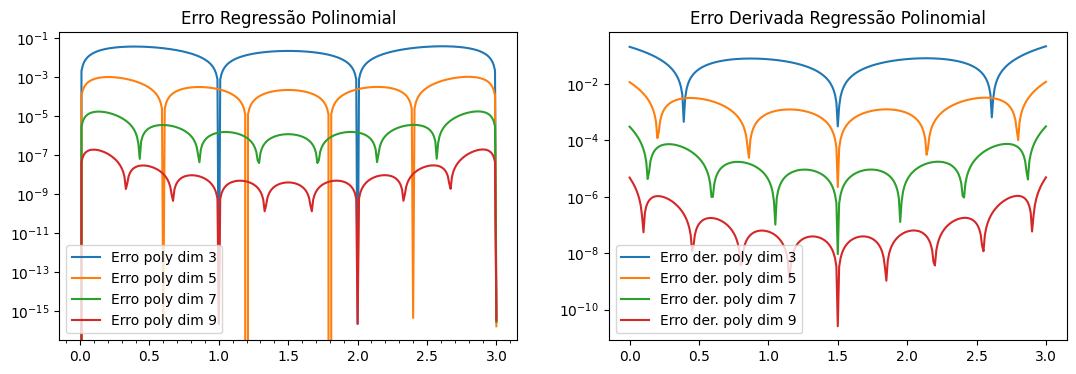

In [15]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(13,4))

def make_interval(i,e, step=0.01):
    r = np.arange(i, e, step)
    if(r[-1] < e):
        r = np.append(r, e)
    return r

intervalo = make_interval(0, 3)
seno = np.sin(intervalo)
dseno = np.cos(intervalo)

def eval_erro_derro(grau, interv):
    intervalo_interp = make_interval(0,3,3/grau)
    sin_interp = np.sin(intervalo_interp)
    coefs_interp = interp(intervalo_interp, sin_interp)
    dcoefs_interp = derivada(coefs_interp)
    seno_interp = polyval(coefs_interp, interv)
    dseno_interp = polyval(dcoefs_interp, interv)
    erro = np.abs(seno - seno_interp)
    derro = np.abs(dseno - dseno_interp)
    print("Erro médio para função - interpolação grau {}: {}".format(grau, np.average(erro)))
    print("Erro máximo para função - interpolação grau {}: {}".format(grau, np.max(erro)))
    print("Erro médio para derivada - interpolação grau {}: {}".format(grau, np.average(derro)))
    print("Erro máximo para derivada - interpolação grau {}: {}".format(grau, np.max(derro)))
    print()
    return (erro, derro)

(erro3, derro3) = eval_erro_derro(3, intervalo)
(erro5, derro5) = eval_erro_derro(5, intervalo)
(erro7, derro7) = eval_erro_derro(7, intervalo)
(erro9, derro9) = eval_erro_derro(9, intervalo)

# Erros de Função
plt.subplot(1,2,1)
plt.semilogy(intervalo, erro3, label="Erro poly dim 3")
plt.semilogy(intervalo, erro5, label="Erro poly dim 5")
plt.semilogy(intervalo, erro7, label="Erro poly dim 7")
plt.semilogy(intervalo, erro9, label="Erro poly dim 9")
ax1.set_axisbelow(True)
ax1.minorticks_on()
plt.title("Erro Regressão Polinomial")
plt.legend()

# Erros de Derivada
plt.subplot(1,2,2)
plt.semilogy(intervalo, derro3, label="Erro der. poly dim 3")
plt.semilogy(intervalo, derro5, label="Erro der. poly dim 5")
plt.semilogy(intervalo, derro7, label="Erro der. poly dim 7")
plt.semilogy(intervalo, derro9, label="Erro der. poly dim 9")
ax1.set_axisbelow(True)
ax1.minorticks_on()
plt.title("Erro Derivada Regressão Polinomial")
plt.legend()

print("Máximas diferença de erro - Pol. grau 3: ")
print(np.max(derro3) - np.max(erro3))
print("Máximas diferença de erro - Pol. grau 5: ")
print(np.max(derro5) - np.max(erro5))
print("Máximas diferença de erro - Pol. grau 7: ")
print(np.max(derro7) - np.max(erro7))
print("Máximas diferença de erro - Pol. grau 9: ")
print(np.max(derro9) - np.max(erro9))
print()

print("Diferenças das médias de erro - Pol. grau 3: ")
print(np.average(derro3) - np.average(erro3))
print("Diferenças das médias de erro - Pol. grau 5: ")
print(np.average(derro5) - np.average(erro5))
print("Diferenças das médias de erro - Pol. grau 7: ")
print(np.average(derro7) - np.average(erro7))
print("Diferenças das médias de erro - Pol. grau 9: ")
print(np.average(derro9) - np.average(erro9))
print()

fig = plt.gcf()

In [16]:
assert len(fig.axes) == 2
for ax in fig.axes:
    assert len(ax.lines) == 4

In [17]:
fig = None

Comente as diferenças e similaridades com o caso anterior.
O que você acha que aconteceu?

Vê-se claramente que continua havendo a tendência de o erro diminuir na medida em que o grau do polinômio interpolador aumenta, assim como aumentam o número de pontos a serem utilizados na interpolação. Isso já estava sendo esperado.

Os valores dos erros de interpolação continua consistentes, sendo os erros de graus maiores menores que os de grau menor, sendo esses graus ímpares ou pares.

Entretanto, uma característica extremamente interessante, tanto das derivadas quanto das funções originais, em relação aos valores interpolados, no caso dos graus de polinômio interpolador ímpares, é que os erros são simétricos em relação ao centro do intervalo interpolador. No caso das interpolações pares, o erro não é simétrico, ficando um pouco menor no lado direito do intervalo.

Parece que, nas interpolações de grau ímpar, a um ponto central no intervalo que é sempre aproximado, e os pontos a serem interpolados estão mais distribuídos em torno desse centro, distribuindo de forma melhor o erro.

## Questão 4: Erros de regressão

Calcule a função seno em 31 pontos igualmente espaçados no intervalo $[0,3]$,
e use-os para ajustar os polinômios de regressão de graus 2, 4, 6 e 8.

Erro médio para função - regressão grau 2: 0.01382424559989354
Erro máximo para função - regressão grau 2: 0.04662836748808524
Erro médio para derivada - regressão grau 2: 0.06510151769511434
Erro máximo para derivada - regressão grau 2: 0.312163759918084

Erro médio para função - regressão grau 4: 0.0002960968890891092
Erro máximo para função - regressão grau 4: 0.000949251787547159
Erro médio para derivada - regressão grau 4: 0.0019628072928118633
Erro máximo para derivada - regressão grau 4: 0.01654875664210853

Erro médio para função - regressão grau 6: 3.3601215834827405e-06
Erro máximo para função - regressão grau 6: 1.0037631730963614e-05
Erro médio para derivada - regressão grau 6: 2.8231312014253885e-05
Erro máximo para derivada - regressão grau 6: 0.0003376470087494976

Erro médio para função - regressão grau 8: 2.329231832526502e-08
Erro máximo para função - regressão grau 8: 8.478651702947815e-08
Erro médio para derivada - regressão grau 8: 2.3950878577481994e-07
Erro máxim

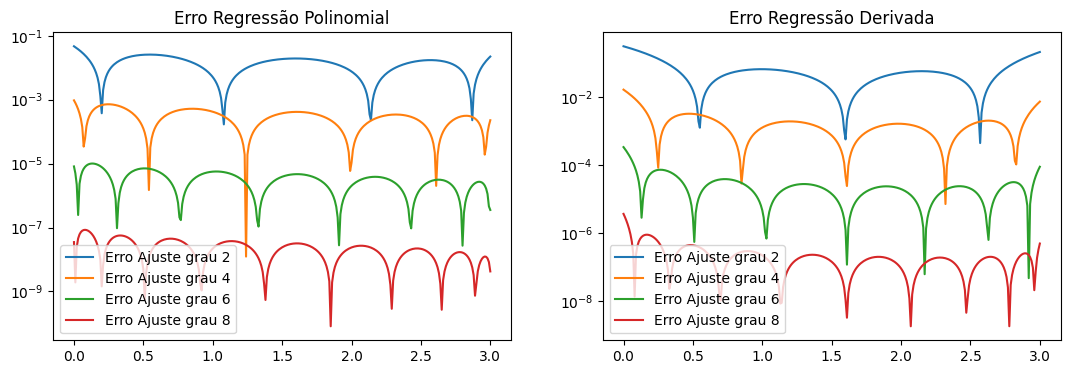

In [18]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(13,4))

intervalo_regressao = make_interval(0,3,3/30)
seno_regressao = np.sin(intervalo_regressao)

coef_regress2 = regress(intervalo_regressao, seno_regressao, 2)
coef_regress4 = regress(intervalo_regressao, seno_regressao, 4)
coef_regress6 = regress(intervalo_regressao, seno_regressao, 6)
coef_regress8 = regress(intervalo_regressao, seno_regressao, 8)

dcoef_regress2 = derivada(coef_regress2)
dcoef_regress4 = derivada(coef_regress4)
dcoef_regress6 = derivada(coef_regress6)
dcoef_regress8 = derivada(coef_regress8)

intervalo = make_interval(0, 3)
seno = np.sin(intervalo)
dseno = np.cos(intervalo)

regress2 = polyval(coef_regress2, intervalo) 
regress4 = polyval(coef_regress4, intervalo) 
regress6 = polyval(coef_regress6, intervalo) 
regress8 = polyval(coef_regress8, intervalo) 

dregress2 = polyval(dcoef_regress2, intervalo) 
dregress4 = polyval(dcoef_regress4, intervalo) 
dregress6 = polyval(dcoef_regress6, intervalo) 
dregress8 = polyval(dcoef_regress8, intervalo) 

erro2 = np.abs(regress2 - seno)
erro4 = np.abs(regress4 - seno)
erro6 = np.abs(regress6 - seno)
erro8 = np.abs(regress8 - seno)

derro2 = np.abs(dregress2 - dseno)
derro4 = np.abs(dregress4 - dseno)
derro6 = np.abs(dregress6 - dseno)
derro8 = np.abs(dregress8 - dseno)

plt.subplot(1,2,1)
plt.semilogy(intervalo, erro2, label="Erro Ajuste grau 2")
plt.semilogy(intervalo, erro4, label="Erro Ajuste grau 4")
plt.semilogy(intervalo, erro6, label="Erro Ajuste grau 6")
plt.semilogy(intervalo, erro8, label="Erro Ajuste grau 8")
plt.title("Erro Regressão Polinomial")
plt.legend()

plt.subplot(1,2,2)
plt.semilogy(intervalo, derro2, label="Erro Ajuste grau 2")
plt.semilogy(intervalo, derro4, label="Erro Ajuste grau 4")
plt.semilogy(intervalo, derro6, label="Erro Ajuste grau 6")
plt.semilogy(intervalo, derro8, label="Erro Ajuste grau 8")
plt.title("Erro Regressão Derivada")
plt.legend()

print("Erro médio para função - regressão grau 2: {}".format(np.average(erro2)))
print("Erro máximo para função - regressão grau 2: {}".format(np.max(erro2)))
print("Erro médio para derivada - regressão grau 2: {}".format(np.average(derro2)))
print("Erro máximo para derivada - regressão grau 2: {}".format(np.max(derro2)))
print()

print("Erro médio para função - regressão grau 4: {}".format(np.average(erro4)))
print("Erro máximo para função - regressão grau 4: {}".format(np.max(erro4)))
print("Erro médio para derivada - regressão grau 4: {}".format(np.average(derro4)))
print("Erro máximo para derivada - regressão grau 4: {}".format(np.max(derro4)))
print()

print("Erro médio para função - regressão grau 6: {}".format(np.average(erro6)))
print("Erro máximo para função - regressão grau 6: {}".format(np.max(erro6)))
print("Erro médio para derivada - regressão grau 6: {}".format(np.average(derro6)))
print("Erro máximo para derivada - regressão grau 6: {}".format(np.max(derro6)))
print()

print("Erro médio para função - regressão grau 8: {}".format(np.average(erro8)))
print("Erro máximo para função - regressão grau 8: {}".format(np.max(erro8)))
print("Erro médio para derivada - regressão grau 8: {}".format(np.average(derro8)))
print("Erro máximo para derivada - regressão grau 8: {}".format(np.max(derro8)))
print()


print("Máximas diferença de erro - Regressao Grau 2: ")
print(np.max(derro2) - np.max(erro2))
print("Máximas diferença de erro - Regressao Grau 4: ")
print(np.max(derro4) - np.max(erro4))
print("Máximas diferença de erro - Regressao Grau 6: ")
print(np.max(derro6) - np.max(erro6))
print("Máximas diferença de erro - Regressao Grau 8: ")
print(np.max(derro8) - np.max(erro8))
print()

print("Diferenças das médias de erro - Regressão Grau 2: ")
print(np.average(derro2) - np.average(erro2))
print("Diferenças das médias de erro - Regressão Grau 4: ")
print(np.average(derro4) - np.average(erro4))
print("Diferenças das médias de erro - Regressão Grau 6: ")
print(np.average(derro6) - np.average(erro6))
print("Diferenças das médias de erro - Regressão Grau 8: ")
print(np.average(derro8) - np.average(erro8))
print()

fig = plt.gcf()

In [19]:
assert len(fig.axes) == 2
for ax in fig.axes:
    assert len(ax.lines) == 4

Compare os erros de ajuste da função (seno), entre este método e o uso dos polinômios interpoladores.

Assim como nos ajustes polinomiais, nas regressões, quanto maior o grau do polinômio de regressão, menor o erro em relação à função original. Entretando, não há diferenças de comportamento entre as regiões centrais dos intervalos e os erros de regressão e os erros de interpolação. Os erros de regressão são mais estáveis e parece não haver grandes diferenças entre os erros no interior do intervalo e nas extremidades. Não é possível encontrar comportamentos simétricos nos erros, e em nenhum ponto o erro iguala a zero, como nos casos dos pontos de interpolação.

Quando o grau do polinômio interpolador é alto (Grau 8), os níveis de erro ficam abaixo de $10^{-7}$, o que é um erro médio menor do que as interpolações de grau alto (8 e 9), que nas extremidades dos intervalos apresentam erro levemente superior a esse erro.

Um problema da regressão é a necessidade de mais pontos para o ajuste, mas o ganho é a maior suavidade do erro.

Compare os erros de ajuste das derivadas.

Os erros das derivadas no caso da regressão, quando comparados com os erros de derivadas de interpolação, possui comportamento similar ao encontrado para a regressão original. Estranhamente, apesar de os erros serem mais estáveis, há um aumento perceptível do erro na medida em que se vai chegando às extremidades do intervalo de regressão, entretanto, essa diferença não parece tão pronunciada quanto nos casos das interpolações, mas são muito, muito similares.

Nas regressões de grau mais alto (Grau 6 e 8), a estabilidade do erro da regressão é muito visível, em relação às interpolações de graus similares, mas, nas interpolações, o erro da derivada na região central do intervalo é aparentemente inferiorao erro das regressões.

No geral, entretanto, as interpolações e as regressões de mesmo grau têm erros na mesma ordem de grandeza, com as interpolações exigindo menos pontos da função.

Provavelmente as regressões, tanto para aproximação da função principal quanto da derivada, devem ser mais interessantes quando há grande número de pontos disponíveis, pois elas podem trabalhar com um grau menor, nesses casos, e evitar _overfitting_.

## Questão 5: Derivadas centrais

Qual seria o tamanho do passo necessário para calcular uma aproximação da derivada usando a derivada central,
de forma a obter um erro comparável com ajuste do polinômio de grau 2? E de grau 4?

Faça os cálculos abaixo, indicando **como você chegou nestes valores**.

É possível ver abaixo, pelo gráfico dos erros do cálculo de derivada central que, a partir do passo igual ou inferior a $p = 0.5$, o valor do erro da Derivada Central já é sistematicamente menor do que $e = 5 \cdot 10^{-2} = 0.05$ (valor máximo $e_{max} \sim 0.0411$ e erro médio $e_{med} \sim 2.55$), que já é melhor que a aproximação da derivada com um polinômio interpolado de grau 2 - a média de erro da Derivada, obtida pela interpolação de grau 2 é $e \sim 0.065$ (Ver questão 2).

Já para se aproximar a derivada em um nível similar à derivada obtida pela interpolação de Grau 4, é necessário ter um passo próximo (ou, obviamente, inferior) a $p = 0.125$, quando o erro máximo da derivada central se torna $e_{max} \sim 0.0026$ e a média de erro se torna $e_{med} \sim 0.00162$. Pela questão 3, é possível ver que o erro médio da derivada, com o polinômio interpolador de grau 4 é $e_{med} \sim 0.002$ e o erro máximo $e_{max} \sim 0.02$.

Média do erro da Derivada Central para passo 1.00E+00: e = 9.84e-02
Erro máximo da Derivada Central para passo 1.00E+00: e = 1.59e-01

Média do erro da Derivada Central para passo 5.00E-01: e = 2.55e-02
Erro máximo da Derivada Central para passo 5.00E-01: e = 4.11e-02

Média do erro da Derivada Central para passo 2.50E-01: e = 6.45e-03
Erro máximo da Derivada Central para passo 2.50E-01: e = 1.04e-02

Média do erro da Derivada Central para passo 1.25E-01: e = 1.62e-03
Erro máximo da Derivada Central para passo 1.25E-01: e = 2.60e-03

Média do erro da Derivada Central para passo 6.25E-02: e = 4.04e-04
Erro máximo da Derivada Central para passo 6.25E-02: e = 6.51e-04



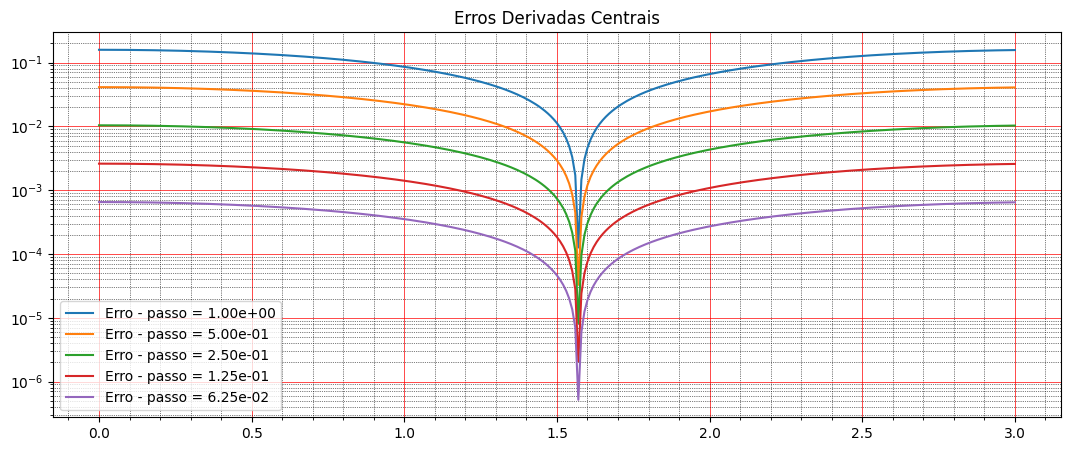

In [20]:
plt.figure(figsize=(13,5))
def df_central(f, x, h=1e-5):
    """Derivada central de  f  em  x, com passo  h"""
    return ( f(x+h) - f(x-h) )/(2*h)

intervalo = make_interval(0, 3)
seno = np.sin(intervalo)
dseno = np.cos(intervalo)

for i in range(5):
    passo = 1/(2**i)
    dseno_prox = df_central(np.sin, intervalo, passo)
    erro_aprox = np.abs(dseno - dseno_prox)
    plt.semilogy(intervalo, np.abs(dseno - dseno_prox), label="Erro - passo = {:.2e}".format(passo))
    print("Média do erro da Derivada Central para passo {:.2E}: e = {:.2e}".format(passo, np.average(erro_aprox)))
    print("Erro máximo da Derivada Central para passo {:.2E}: e = {:.2e}\n".format(passo, np.max(erro_aprox)))

ax = plt.gca()
ax.set_axisbelow(True)
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth='0.5', color='red')
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title("Erros Derivadas Centrais")
plt.legend()


Agora, faça o ajuste dos polinômios de grau 12, 14 e 16, por interpolação, no intervalo $[0,3]$.

Erro médio para função - interpolação grau 12: 1.2646061408275353e-12
Erro máximo para função - interpolação grau 12: 2.088593187288268e-11
Erro médio para derivada - interpolação grau 12: 2.0087665893419105e-11
Erro máximo para derivada - interpolação grau 12: 7.861404860420862e-10

Erro médio para função - interpolação grau 14: 4.646955347283187e-15
Erro máximo para função - interpolação grau 14: 8.709005738793962e-14
Erro médio para derivada - interpolação grau 14: 8.37026251074337e-14
Erro máximo para derivada - interpolação grau 14: 3.997913111675189e-12

Erro médio para função - interpolação grau 16: 3.139791859508852e-16
Erro máximo para função - interpolação grau 16: 4.191091917959966e-15
Erro médio para derivada - interpolação grau 16: 4.9528429991467914e-15
Erro máximo para derivada - interpolação grau 16: 2.1860291354869332e-13

Máximas diferença de erro - Pol. grau 12: 
7.652545541692035e-10
Máximas diferença de erro - Pol. grau 14: 
3.910823054287249e-12
Máximas diferença 

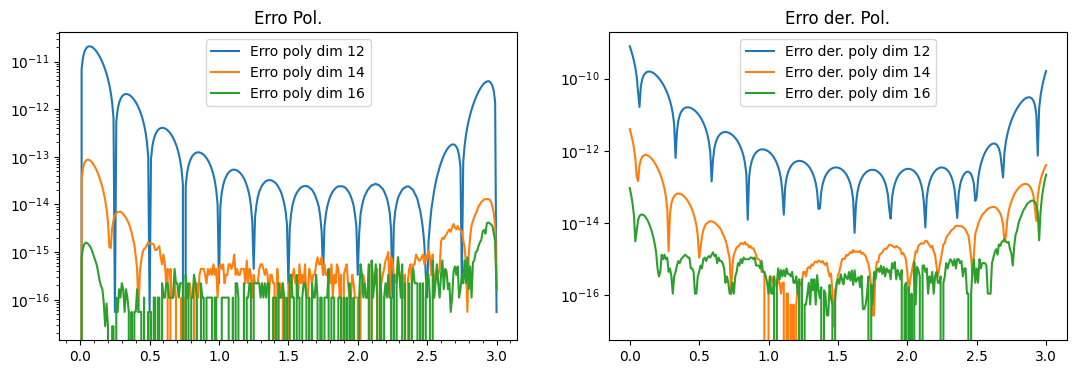

In [21]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(13,4))

def make_interval(i,e, step=0.01):
    r = np.arange(i, e, step)
    if(r[-1] < e):
        r = np.append(r, e)
    return r

intervalo = make_interval(0, 3)
seno = np.sin(intervalo)
dseno = np.cos(intervalo)

def eval_erro_derro(grau, interv):
    intervalo_interp = make_interval(0,3,3/grau)
    sin_interp = np.sin(intervalo_interp)
    coefs_interp = interp(intervalo_interp, sin_interp)
    dcoefs_interp = derivada(coefs_interp)
    seno_interp = polyval(coefs_interp, interv)
    dseno_interp = polyval(dcoefs_interp, interv)
    erro = np.abs(seno - seno_interp)
    derro = np.abs(dseno - dseno_interp)
    print("Erro médio para função - interpolação grau {}: {}".format(grau, np.average(erro)))
    print("Erro máximo para função - interpolação grau {}: {}".format(grau, np.max(erro)))
    print("Erro médio para derivada - interpolação grau {}: {}".format(grau, np.average(derro)))
    print("Erro máximo para derivada - interpolação grau {}: {}".format(grau, np.max(derro)))
    print()
    return (erro, derro)

(erro12, derro12) = eval_erro_derro(12, intervalo)
(erro14, derro14) = eval_erro_derro(14, intervalo)
(erro16, derro16) = eval_erro_derro(16, intervalo)

# Erros de Função
plt.subplot(1,2,1)
plt.semilogy(intervalo, erro12, label="Erro poly dim 12")
plt.semilogy(intervalo, erro14, label="Erro poly dim 14")
plt.semilogy(intervalo, erro16, label="Erro poly dim 16")
ax1.set_axisbelow(True)
ax1.minorticks_on()
plt.title("Erro Pol.")
plt.legend()

# Erros de Derivada
plt.subplot(1,2,2)
plt.semilogy(intervalo, derro12, label="Erro der. poly dim 12")
plt.semilogy(intervalo, derro14, label="Erro der. poly dim 14")
plt.semilogy(intervalo, derro16, label="Erro der. poly dim 16")
ax1.set_axisbelow(True)
ax1.minorticks_on()
plt.title("Erro der. Pol.")
plt.legend()

print("Máximas diferença de erro - Pol. grau 12: ")
print(np.max(derro12) - np.max(erro12))
print("Máximas diferença de erro - Pol. grau 14: ")
print(np.max(derro14) - np.max(erro14))
print("Máximas diferença de erro - Pol. grau 16: ")
print(np.max(derro16) - np.max(erro16))
print()

print("Diferenças das médias de erro - Pol. grau 12: ")
print(np.average(derro12) - np.average(erro12))
print("Diferenças das médias de erro - Pol. grau 14: ")
print(np.average(derro14) - np.average(erro14))
print("Diferenças das médias de erro - Pol. grau 16: ")
print(np.average(derro16) - np.average(erro16))
print()

Qual a magnitude do erro que você obtém para a derivada, no intervalo $[0,3]$?

As médias de erros de derivadas para grau 12, 14 e 16, respectivamente, são $e_{med-12} \sim 2.01 \cdot 10^{-11}$, $e_{med-14} \sim 8,71 \cdot 10^{-14}$ e $e_{med-16} \sim 4,95 \cdot 10^{-15}$, enquanto os máximos, respectivamente, são: $e_{max-12} \sim 7.86 \cdot 10^{-10}$, $e_{max-14} \sim 4,00 \cdot 10^{-12}$ e $e_{max-16} \sim 2,19 \cdot 10^{-13}$.

Ou seja, as magnitudes dos erros estão em:
* $10^{-10}$, para o caso de interpolação de grau 12
* $10^{-12}$, para o caso de interpolação de grau 14
* $10^{-13}$, para o caso de interpolação de grau 16

Qual seria o passo no método das derivadas centrais para obter esse erro?

Para se conseguir, via Derivadas Centrais, o erro da derivada obtida pela interpolação de Grau 12, o passo seria $p \sim 6.1 \cdot 10^{-5}$, para o erro da interpolação de Grau 14, seria $p \sim 7.7 \cdot 10^{-6}$, mas, a partir desse ponto, o erro do método da Derivada Central começa a ser dominado por erros numéricos e de truncamento, não sendo possível uma aproximação melhor, nem atingindo o nível de aproximação da derivada com a interpolação de Grau 16.

Média do erro da Derivada Central para passo 3.12E-02: e = 1.01e-04
Erro máximo da Derivada Central para passo 3.12E-02: e = 1.63e-04

Média do erro da Derivada Central para passo 1.56E-02: e = 2.53e-05
Erro máximo da Derivada Central para passo 1.56E-02: e = 4.07e-05

Média do erro da Derivada Central para passo 7.81E-03: e = 6.32e-06
Erro máximo da Derivada Central para passo 7.81E-03: e = 1.02e-05

Média do erro da Derivada Central para passo 3.91E-03: e = 1.58e-06
Erro máximo da Derivada Central para passo 3.91E-03: e = 2.54e-06

Média do erro da Derivada Central para passo 1.95E-03: e = 3.95e-07
Erro máximo da Derivada Central para passo 1.95E-03: e = 6.36e-07

Média do erro da Derivada Central para passo 9.77E-04: e = 9.87e-08
Erro máximo da Derivada Central para passo 9.77E-04: e = 1.59e-07

Média do erro da Derivada Central para passo 4.88E-04: e = 2.47e-08
Erro máximo da Derivada Central para passo 4.88E-04: e = 3.97e-08

Média do erro da Derivada Central para passo 2.44E-04: 

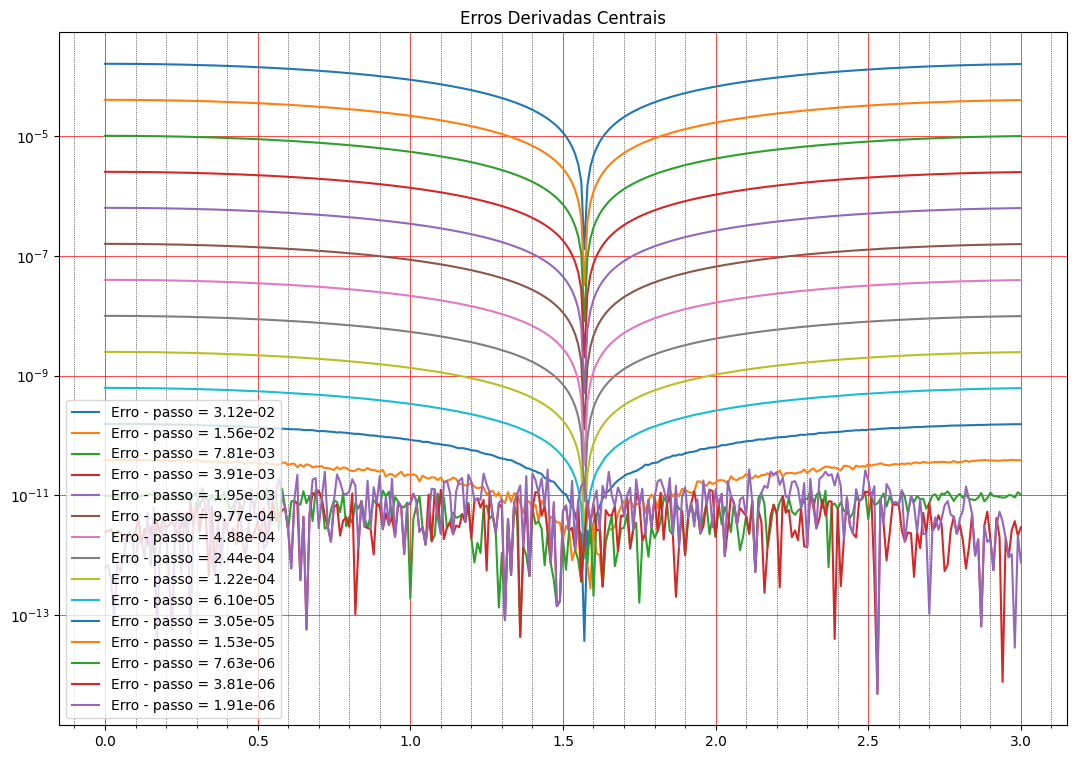

In [22]:
plt.figure(figsize=(13,9))
def df_central(f, x, h=1e-5):
    """Derivada central de  f  em  x, com passo  h"""
    return ( f(x+h) - f(x-h) )/(2*h)

intervalo = make_interval(0, 3)
seno = np.sin(intervalo)
dseno = np.cos(intervalo)

for i in range(5, 20):
    passo = 1/(2**i)
    dseno_prox = df_central(np.sin, intervalo, passo)
    erro_aprox = np.abs(dseno - dseno_prox)
    plt.semilogy(intervalo, np.abs(dseno - dseno_prox), label="Erro - passo = {:.2e}".format(passo))
    print("Média do erro da Derivada Central para passo {:.2E}: e = {:.2e}".format(passo, np.average(erro_aprox)))
    print("Erro máximo da Derivada Central para passo {:.2E}: e = {:.2e}\n".format(passo, np.max(erro_aprox)))

ax = plt.gca()
ax.set_axisbelow(True)
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth='0.5', color='red')
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title("Erros Derivadas Centrais")
plt.legend()

Comente

Usando a técnica da Derivada Central, para cálculo da derivada, fica visível que a partir do momento em que o passo se torna menor do que $p = 7 \cdot 10^{-6}$ - os erros de truncamento se tornam dominantes e uma aproximação melhor de derivada não é mais possível.

Entretanto, utilizando a interpolação polinomial, essa limitação pode ser vencida, com interpolações de polinômios de graus muito altos, como, por exemplo, acima de Grau 14, mostrando que o método da Derivada Central se esgota antes do Método da Interpolação Polinomial, para se calcular derivadas numericamente.

# Parte 2: Interpolação com derivadas

Suponha que, além dos valores $y_i = f(x_i)$, também possuímos $z_i = f'(x_i)$.
Deveríamos ser capazes de calcular melhores polinômios interpoladores!

## Questão 6: Equações

Suponha que são dados apenas 2 pontos.
- Quais equações os coeficientes do polinômio devem satisfazer?
- Qual o grau deste polinômio?
- A matriz deste sistema é inversível?

As equações que os coeficientes desse polinômio deve satisfazer são:

Sejam:

* Coeficientes dados por: $a_i$
* Valores dos pontos em $x$ dados por: $x_i$
* Valores dos pontos em $y$ dados por: $y_i = f(x_i)$
* Valores das derivadas $f'(x)$ em $z$ dados por: $z_i = f'(x_i)$

$\begin{cases}
  a_0 + a_1 \cdot x_1 + a_2 \cdot x_1^2 + a_3 \cdot x_1^3 = y_1\\
  a_0 + a_1 \cdot x_2 + a_2 \cdot x_2^2 + a_3 \cdot x_2^3 = y_2\\
  a_1 + 2a_2 \cdot x_1 + 3a_3 \cdot x_1^2 = z_1\\
  a_1 + 2a_2 \cdot x_1 + 3a_3 \cdot x_1^2 = z_2\\
\end{cases}$

Que pode ser escrito matricialmente dessa seguinte forma:

$\begin{pmatrix}
1 & x_1 & x_1^2 & x_1^3 \\
1 & x_2 & x_2^2 & x_2^3 \\
0 & 1 & 2x_1 & 3x_1^2 \\
0 & 1 & 2x_1 & 3x_1^2
\end{pmatrix} \begin{bmatrix}
a_0 \\
a_1 \\
a_2 \\
a_3 
\end{bmatrix} = \begin{bmatrix}
y_0 \\
y_1 \\
z_1 \\
z_2 
\end{bmatrix} $

Como o posto da matriz de coeficientes é igual ao número de linhas (todas as linhas são linearmente independentes se os $x_i$ forem diferentes entre si), a matriz é, claramente, inversível.

No caso geral, quais são as novas equações que os coeficientes $p_i$ devem satisfazer?

Usando a notação de matriz em bloco, podemos escrever o caso geral da seguinte forma:

$\begin{pmatrix}
\begin{pmatrix} x_{ij}^j \end{pmatrix}_{i \times j}\\
\begin{pmatrix} j \cdot x_{ij}^{j-1} \end{pmatrix}_{i \times j}
\end{pmatrix}_{2i \times j} \begin{bmatrix} p_i \end{bmatrix}_{2i \times j} = \begin{bmatrix} \begin{pmatrix} y_i \end{pmatrix}_{i \times 1}\\
\begin{pmatrix} z_i \end{pmatrix}_{i \times 1} \end{bmatrix}_{2i \times 1}$

Onde $\begin{pmatrix}\end{pmatrix}_{i x j}$ é a matriz com $i$ linhas e $j$ colunas e $a_{ij}$ é o elemento da linha $i$ e da coluna $j$ e $\begin{pmatrix} a_{ij} \end{pmatrix}_{i x j}$ é a matriz com $i$ linhas e $j$ colunas, com os seus elementos representados por $a_{ij}$ e $a_i \equiv a_{i1}$.

Escreva a função `matrix_der(xs,d)` que calcula a matriz que multiplica estes coeficientes,
(nas novas equações)
em função dos pontos `xs` onde sabemos as derivadas e do grau `d` que o polinômio terá.

(Essa função é análoga à função que constrói a matriz para a interpolação e regressão)

In [23]:
def matrix_der(xs, d):
    xs = np.asarray(xs, dtype=float)
    return np.concatenate((np.array([[0]] * len(xs)), np.array([i*np.power(xs,i-1) for i in range(1, d+1)]).transpose()), axis=1)

In [24]:
M1 = matrix_der([1,2,3], 3)
ans = [[ 0.,  1.,  2.,  3.],
       [ 0.,  1.,  4., 12.],
       [ 0.,  1.,  6., 27.]]
assert np.allclose(M1, ans)

In [25]:
M1 = matrix_der([1,2,3,4,5], 3)
assert np.shape(M1) == (5,4)

In [26]:
M1 = matrix_der([1,2,3,4,5], 8)
assert np.shape(M1) == (5,9)

## Questão 7: Resolvendo o sistema

Para construir matrizes e vetores em "blocos", você pode usar `np.hstack`, `np.vstack` e/ou `np.block`.

In [27]:
def interp1(xs, ys, zs):
    "Retorna os coeficientes do polinomio interpolador para os pontos  (xs, ys), com respectivas derivadas zs."
    def vander_estendido(a):
        l = len(a)
        l2 = len(a)*2
        return np.array([[a[v % l] ** i for i in range(l2)] for v in range(l)])
    l = len(xs)
    assert l == len(ys)
    assert l == len(zs)
    _xs = vander_estendido(xs)
    _dxs = matrix_der(xs, 2*l - 1)
    coefs = np.concatenate((_xs, _dxs), axis=0)
    resps = np.concatenate((np.array(ys), np.array(zs)), axis=0)
    return np.linalg.solve(coefs, resps)

In [28]:
coefs = interp1([0], [1], [1])
assert np.allclose(coefs, [1,1])

In [29]:
coefs = interp1([1], [1], [1])
assert np.allclose(coefs, [0,1])

Explique a resposta dos dois `assert`s acima (analiticamente)

O primeiro assert representa o seguinte sistema de equações:

$\begin{cases}
f(x) = a_0 + a_1 \cdot x \\
f'(x) = a_1 \\
\end{cases} \Rightarrow \begin{cases}
f(0) = a_0 + a_1 \cdot 0 = a_0 = 1\\
f'(0) = a_1 = 1\\
\end{cases}$

O que leva os coeficientes $\begin{bmatrix} a_0 \\ a_1 \end{bmatrix}$ = $\begin{bmatrix} 1 \\ 1 \end{bmatrix}$

Já o segundo assert representa o seguinte sistema de equações:

$\begin{cases}
f(x) = a_0 + a_1 \cdot x \\
f'(x) = a_1 \\
\end{cases} \Rightarrow \begin{cases}
f(1) = a_0 + a_1 \cdot 1 = a_0 + a_1 = 1\\
f'(1) = a_1 = 1\\
\end{cases} \Rightarrow \begin{cases}
a_0 = 0\\
a_1 = 1\\
\end{cases}$

O que leva os coeficientes $\begin{bmatrix} a_0 \\ a_1 \end{bmatrix}$ = $\begin{bmatrix} 0 \\ 1 \end{bmatrix}$

In [30]:
coefs = interp1([0,1], [1,1], [1,1])
assert np.allclose(coefs, [1,1,-3,2])

In [31]:
xs = np.array([0,1.0])
ys = np.array([1,3.0])
zs = np.array([1,1.0])
coefs = interp1(xs, ys, zs)
assert np.allclose(coefs, [1,1,3,-2])

Explique porque os coeficientes de grau 0 e 1 são os mesmos de só fazer a interpolação no zero.

A interpolação com a derivada em um único ponto representa uma função linear cuja derivada é constante igual ao valor da própria derivada, levando o segundo coeficiente a ser igual ao segundo parâmetro. O primeiro coeficiente, por sua vez, representa o valor da função quando $x = 0$, que é o primeiro parâmetro.

Isso pode ser visto claramente nesse sistema de equações (já apresentado anteriormente):

$\begin{cases}
f(x) = a_0 + a_1 \cdot x \\
f'(x) = a_1 \\
\end{cases} \Rightarrow \begin{cases}
f(0) = a_0 + a_1 \cdot 0 = a_0 = y\\
f'(0) = a_1 = z\\
\end{cases}$

## Questão 8: Erro

O erro decai conforme aumentamos o número de pontos?
Teste para as funções $f(x) = \cos(x)$ e $g(x) = e^x$ no intervalo $[-1, 2]$.

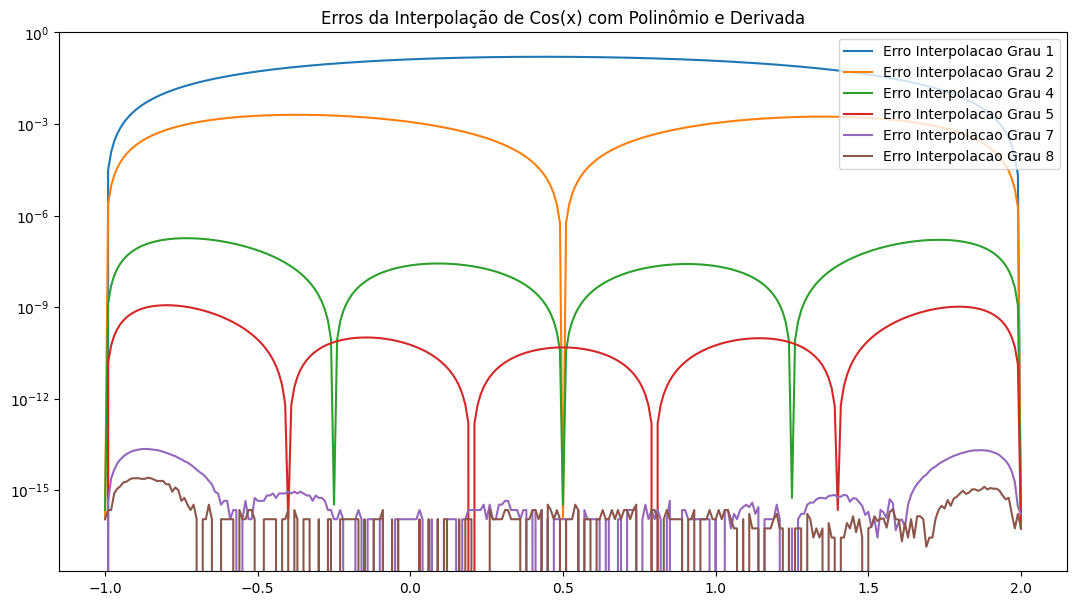

In [32]:
# Gráficos de erro para o cosseno
plt.figure(figsize=(13,7))

for d in range(6):
    grau = int(np.floor(d * 1.5 + 1))
    intervalo_interpolacao = make_interval(-1, 2, 3/grau)
    cos_interpolacao = np.cos(intervalo_interpolacao)
    dcos_interpolacao = -np.sin(intervalo_interpolacao)
    cos_aprox_coefs = interp1(intervalo_interpolacao, cos_interpolacao, dcos_interpolacao)
    intervalo = make_interval(-1, 2)
    cos = np.cos(intervalo)
    cos_aprox = polyval(cos_aprox_coefs, intervalo)
    erros = np.abs(cos - cos_aprox)
    plt.semilogy(intervalo, erros, label="Erro Interpolacao Grau {}".format(grau))
    
plt.title("Erros da Interpolação de Cos(x) com Polinômio e Derivada")
plt.legend()

ax = plt.gca()

In [33]:
assert len(ax.get_title()) >= 10
assert len(ax.lines) >= 5

In [34]:
ax = None

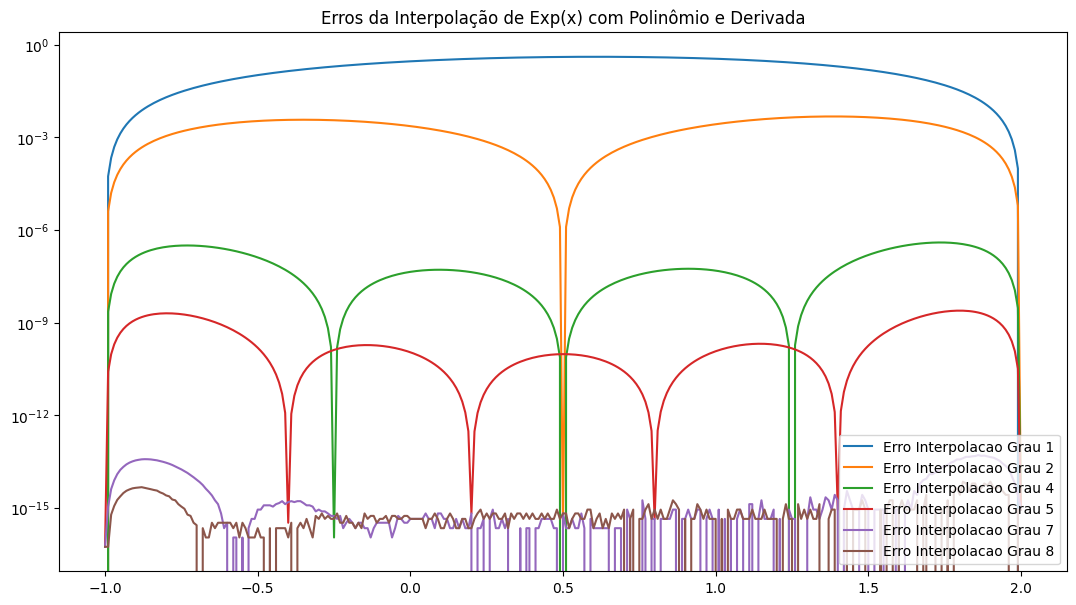

In [35]:
# Gráficos de erro para a função exponencial
plt.figure(figsize=(13,7))

for d in range(6):
    grau = int(np.floor(d * 1.5 + 1))
    intervalo_interpolacao = make_interval(-1, 2, 3/grau)
    exps_interpolacao = np.exp(intervalo_interpolacao)
    dexps_interpolacao = np.exp(intervalo_interpolacao)
    exps_aprox_coefs = interp1(intervalo_interpolacao, exps_interpolacao, dexps_interpolacao)
    intervalo = make_interval(-1, 2)
    exps = np.exp(intervalo)
    exps_aprox = polyval(exps_aprox_coefs, intervalo)
    erros = np.abs(exps - exps_aprox)
    plt.semilogy(intervalo, erros, label="Erro Interpolacao Grau {}".format(grau))
    
plt.title("Erros da Interpolação de Exp(x) com Polinômio e Derivada")
plt.legend()

ax = plt.gca()

In [36]:
assert len(ax.get_title()) >= 10
assert len(ax.lines) >= 5

## Questão 9: Comparando

Há duas formas de obter um polinômio de grau 9 para interpolar a função cosseno:
- calcular a função em 10 pontos igualmente espaçados;
- calcular a função e sua derivada em 5 pontos igualmente espaçados.

Faça um gráfico dos erros, no interalo $[-1,2]$, para cada um destes polinômios.

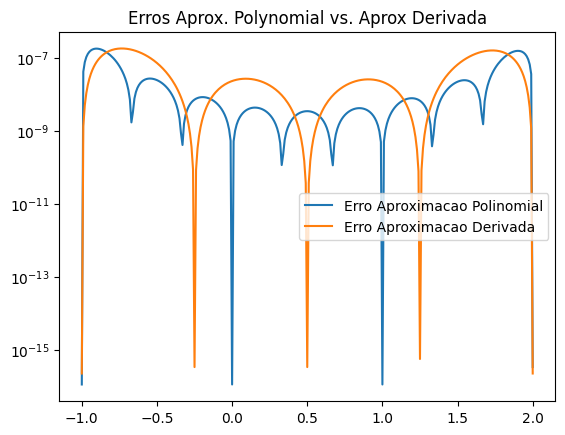

In [37]:
def compara_poly_deriv_cos(grau):
    step_poly = 3/grau
    intervalo_interpolacao_poly = make_interval(-1, 2, step_poly)
    cos_interpolacao_poly = np.cos(intervalo_interpolacao_poly)
    coefs_cos_poly = interp(intervalo_interpolacao_poly, cos_interpolacao_poly)

    step_deriv = 3/np.floor(grau/2)
    intervalo_interpolacao_deriv = make_interval(-1, 2, step_deriv)
    cos_interpolacao_deriv = np.cos(intervalo_interpolacao_deriv)
    dcos_interpolacao_deriv = -np.sin(intervalo_interpolacao_deriv)
    coefs_cos_deriv = interp1(intervalo_interpolacao_deriv, cos_interpolacao_deriv, dcos_interpolacao_deriv)

    intervalo = make_interval(-1, 2)
    cos = np.cos(intervalo)
    cos_poly_aprox = polyval(coefs_cos_poly, intervalo)
    cos_deriv_aprox = polyval(coefs_cos_deriv, intervalo)

    erro_poly = np.abs(cos - cos_poly_aprox)
    erro_deriv = np.abs(cos - cos_deriv_aprox)

    plt.semilogy(intervalo, erro_poly, label="Erro Aproximacao Polinomial")
    plt.semilogy(intervalo, erro_deriv, label="Erro Aproximacao Derivada")
    plt.title("Erros Aprox. Polynomial vs. Aprox Derivada")
    plt.legend()
    return (erro_poly, erro_deriv)

erro_poly, erro_deriv = compara_poly_deriv_cos(9)

Para termos uma medida quantitativa,
calcule a soma dos valores absolutos dos erros,
para vários pontos ao longo do intervalo $[-1,2]$

In [38]:
soma_erro_poly = np.sum(erro_poly)
soma_erro_deriv = np.sum(erro_deriv)

print("Soma dos erros da aproximação polinomial: {:.3e}".format(soma_erro_poly))
print("Soma dos erros da aproximação polinomial: {:.3e}".format(soma_erro_deriv))

Soma dos erros da aproximação polinomial: 8.042e-06
Soma dos erros da aproximação polinomial: 1.432e-05


Faça o mesmo estudo para polinômios de grau 7, 11 e 15.

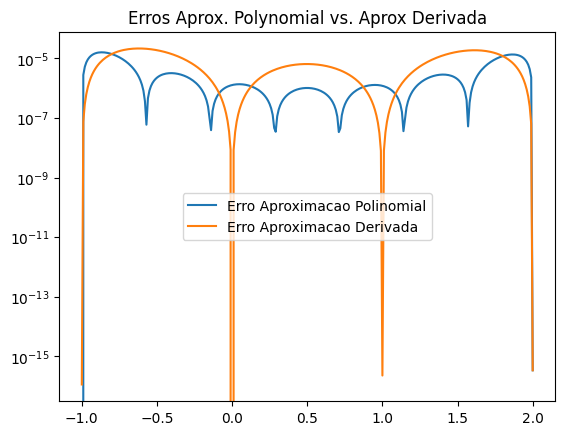

In [39]:
erro_poly7, erro_deriv7 = compara_poly_deriv_cos(7)

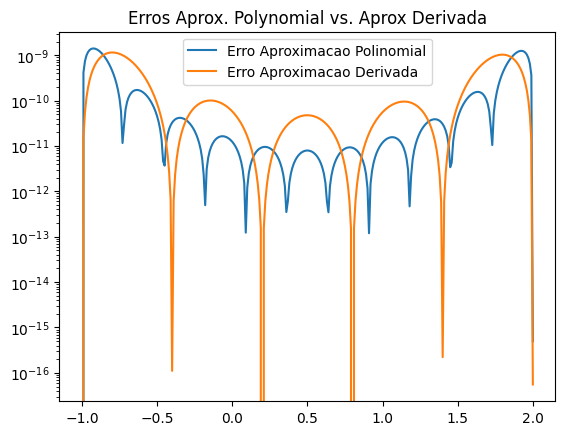

In [40]:
erro_poly11, erro_deriv11 = compara_poly_deriv_cos(11)

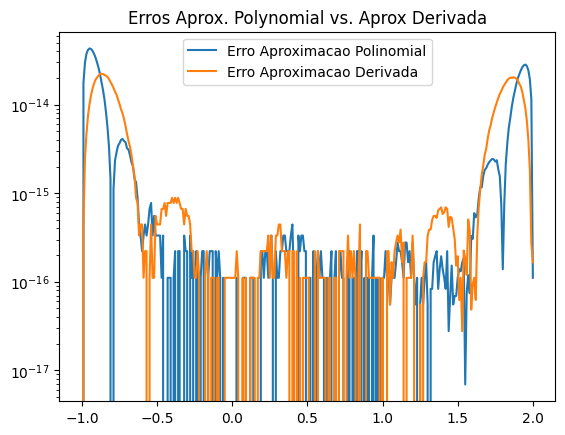

In [41]:
erro_poly15, erro_deriv15 = compara_poly_deriv_cos(15)

O que você observa?

In [42]:
soma_erro_poly7 = np.sum(erro_poly7)
soma_erro_deriv7 = np.sum(erro_deriv7)

print("Soma dos erros da aproximação polinomial - Grau 7: {:.3e}".format(soma_erro_poly7))
print("Soma dos erros da aproximação polinomial - Grau 7: {:.3e}".format(soma_erro_deriv7))
print()

soma_erro_poly11 = np.sum(erro_poly11)
soma_erro_deriv11 = np.sum(erro_deriv11)

print("Soma dos erros da aproximação polinomial - Grau 11: {:.3e}".format(soma_erro_poly11))
print("Soma dos erros da aproximação polinomial - Grau 11: {:.3e}".format(soma_erro_deriv11))
print()

soma_erro_poly15 = np.sum(erro_poly15)
soma_erro_deriv15 = np.sum(erro_deriv15)

print("Soma dos erros da aproximação polinomial - Grau 15: {:.3e}".format(soma_erro_poly15))
print("Soma dos erros da aproximação polinomial - Grau 15: {:.3e}".format(soma_erro_deriv15))

Soma dos erros da aproximação polinomial - Grau 7: 1.016e-03
Soma dos erros da aproximação polinomial - Grau 7: 2.355e-03

Soma dos erros da aproximação polinomial - Grau 11: 4.848e-08
Soma dos erros da aproximação polinomial - Grau 11: 6.892e-08

Soma dos erros da aproximação polinomial - Grau 15: 8.785e-13
Soma dos erros da aproximação polinomial - Grau 15: 8.691e-13


É possível ver que os erros, tanto da interpolação polinomial simples, quanto da interpolação polinomial com a derivada, se mantêm nas mesmas ordens de grandeza, quando consideramos as condições de aproximação dadas nos exercícios acima. 

Entretanto, a aproximação polinomial com derivada se apresenta com o erro sistematicamente maior do que a aproximação simples, entretanto, na medida em que os graus aumentam, os valores dos erros vão se aproximando.

De certa forma, os métodos são correspondentes para se chegar em uma boa interpolação e aproximação da função dada.

Refaça para a função exponencial, com vários graus.

In [43]:
def compara_poly_deriv_exp(grau):
    step_poly = 3/grau
    intervalo_interpolacao_poly = make_interval(-1, 2, step_poly)
    exps_interpolacao_poly = np.exp(intervalo_interpolacao_poly)
    coefs_exps_poly = interp(intervalo_interpolacao_poly, exps_interpolacao_poly)

    step_deriv = 3/np.floor(grau/2)
    intervalo_interpolacao_deriv = make_interval(-1, 2, step_deriv)
    exps_interpolacao_deriv = np.exp(intervalo_interpolacao_deriv)
    dexps_interpolacao_deriv = np.exp(intervalo_interpolacao_deriv)
    coefs_exps_deriv = interp1(intervalo_interpolacao_deriv, exps_interpolacao_deriv, dexps_interpolacao_deriv)

    intervalo = make_interval(-1, 2)
    exps = np.exp(intervalo)
    exps_poly_aprox = polyval(coefs_exps_poly, intervalo)
    exps_deriv_aprox = polyval(coefs_exps_deriv, intervalo)

    erro_poly = np.abs(exps - exps_poly_aprox)
    erro_deriv = np.abs(exps - exps_deriv_aprox)

    plt.semilogy(intervalo, erro_poly, label="Erro Aproximacao Polinomial")
    plt.semilogy(intervalo, erro_deriv, label="Erro Aproximacao Derivada")
    plt.title("Erros Aprox. Polynomial vs. Aprox Derivada")
    plt.legend()
    return (erro_poly, erro_deriv)

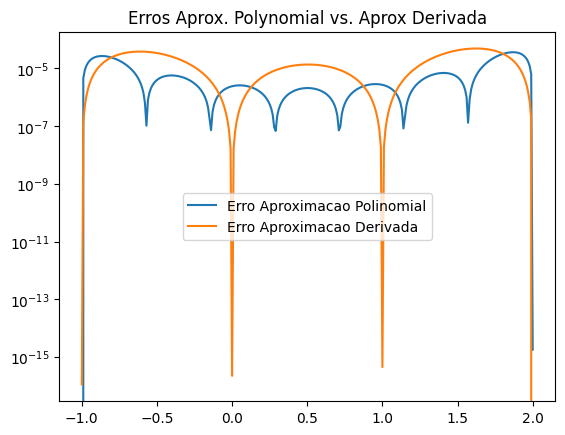

In [44]:
erro_poly, erro_deriv = compara_poly_deriv_exp(7)

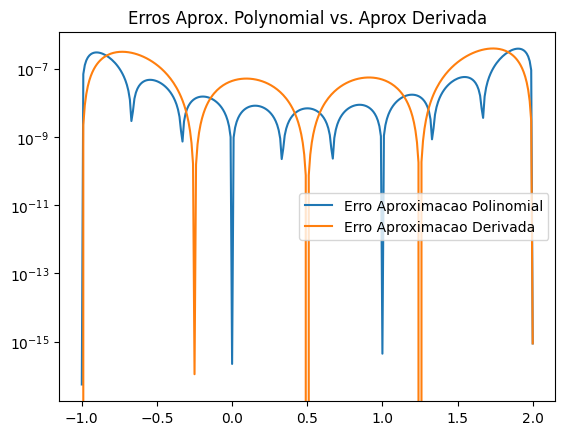

In [45]:
erro_poly, erro_deriv = compara_poly_deriv_exp(9)

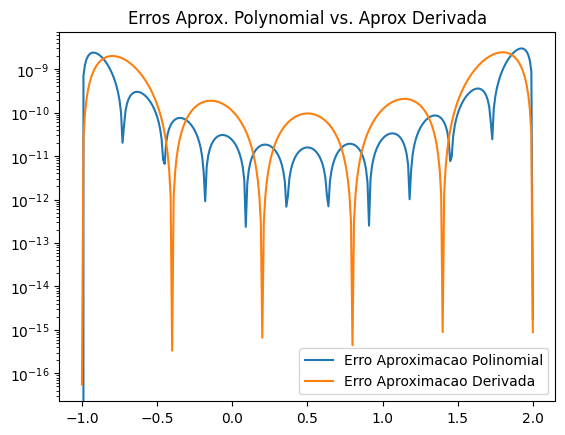

In [46]:
erro_poly, erro_deriv = compara_poly_deriv_exp(11)

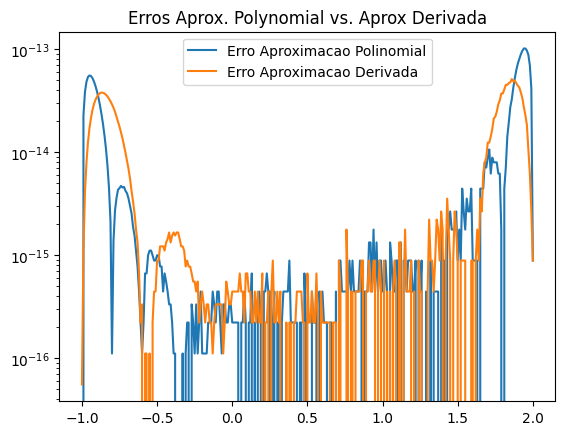

In [47]:
erro_poly, erro_deriv = compara_poly_deriv_exp(15)

O que você viu no caso do cosseno se mantém aqui?
Porque você acha que isso aconteceu?

In [48]:
soma_erro_poly7 = np.sum(erro_poly7)
soma_erro_deriv7 = np.sum(erro_deriv7)

print("Soma dos erros da aproximação polinomial - Grau 7: {:.3e}".format(soma_erro_poly7))
print("Soma dos erros da aproximação polinomial - Grau 7: {:.3e}".format(soma_erro_deriv7))
print()

soma_erro_poly11 = np.sum(erro_poly11)
soma_erro_deriv11 = np.sum(erro_deriv11)

print("Soma dos erros da aproximação polinomial - Grau 11: {:.3e}".format(soma_erro_poly11))
print("Soma dos erros da aproximação polinomial - Grau 11: {:.3e}".format(soma_erro_deriv11))
print()

soma_erro_poly15 = np.sum(erro_poly15)
soma_erro_deriv15 = np.sum(erro_deriv15)

print("Soma dos erros da aproximação polinomial - Grau 15: {:.3e}".format(soma_erro_poly15))
print("Soma dos erros da aproximação polinomial - Grau 15: {:.3e}".format(soma_erro_deriv15))

Soma dos erros da aproximação polinomial - Grau 7: 1.016e-03
Soma dos erros da aproximação polinomial - Grau 7: 2.355e-03

Soma dos erros da aproximação polinomial - Grau 11: 4.848e-08
Soma dos erros da aproximação polinomial - Grau 11: 6.892e-08

Soma dos erros da aproximação polinomial - Grau 15: 8.785e-13
Soma dos erros da aproximação polinomial - Grau 15: 8.691e-13


O comportamento das aproximações polinomiais simples, e com as derivadas, no caso da função exponencial, teve o mesmo comportamento das aproximações para a função cosseno.

Diversos motivos podem ser encontrados, desde o fato de ambas as funções serem contínuas e infinitamente deriváveis, sendo a aproximação linear por polinômio, na verdade, uma aproximação de Taylor (invertida) das funções, por isso tanto com as derivadas, quanto sem elas, para as duas funções, os comportamentos são similares, até o fato de a função cosseno e seno terem uma relação bastante "íntima", no Conjunto dos Complexos, relação que existe também no conjunto dos Reais, levando a crer que o comportamento delas deve ser similar.

Por último, a interpolação polinomial simples utiliza pontos mais próximos entre si, não permitindo a propagação de erros por distância dos pontos de interpolação, o que pode ser visto, pois, na medida em que aumentamos o número de pontos das interpolações, o acumulado de erros vai se tornando mais próximo, até o ponto em que os erros de truncagem se tornam dominantes.